# Student Performance Indicator

## Life cycle of ML project

- Understading the Problem Statement<br>
- Data collection<br>
- Data Checks to perform<br>
- Exploratory data analysis<br>
- Data Pre-processing<br>
- Model Training<br>
- Choose best model

## (1)Problem Statement<br>

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## (2)Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977<br>
- The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Package

Importing Pandas,Numpy,Matplotlib,Seaborn and Warings Library

In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## 2.2 Dataset Information

- gender : sex of students -> (Male/female)<br>
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)<br>
- parental level of education : parents' final education ->(bachelor's degree, some college,master's degree,associate's degree,high school)<br>
- lunch : having lunch before test (standard or free/reduced)<br>
- test preparation course : complete or not complete before test<br>
- math score<br>
- reading score<br>
- writing score

## (3)Operations

- Check Missing values<br>
- Check Duplicates<br>
- Check data type<br>
- Check the number of unique values of each column<br>
- Check statistics of data set<br>
- Check various categories present in the different categorical column

### 3.1 

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Observation:-<br>
- There are no Missing value in this dataset

### 3.2

In [6]:
df.duplicated().sum()

np.int64(0)

### Observation:-<br>
- There are no Duplicate value in this dataset

### 3.3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.6


In [12]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethinicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'lunch' variable:      ['standard' 'free/reduced']


In [13]:
# Define Numeric and Categorical Feature colums

numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns

print('We have {} Numerical Features :{}'.format(len(numeric_feature),numeric_feature))
print('we have {} Categorical Feature : {}'.format(len(categorical_feature),categorical_feature))

We have 3 Numerical Features :['math_score', 'reading_score', 'writing_score']
we have 5 Categorical Feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [14]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['Average'] = df['Total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = (df['reading_score'] == 100).sum()
writing_full = (df['writing_score'] == 100).sum()
math_full = (df['math_score'] == 100).sum()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


## (4)Exploring Data(Visualization)

### 4.1

<Axes: xlabel='Average', ylabel='Count'>

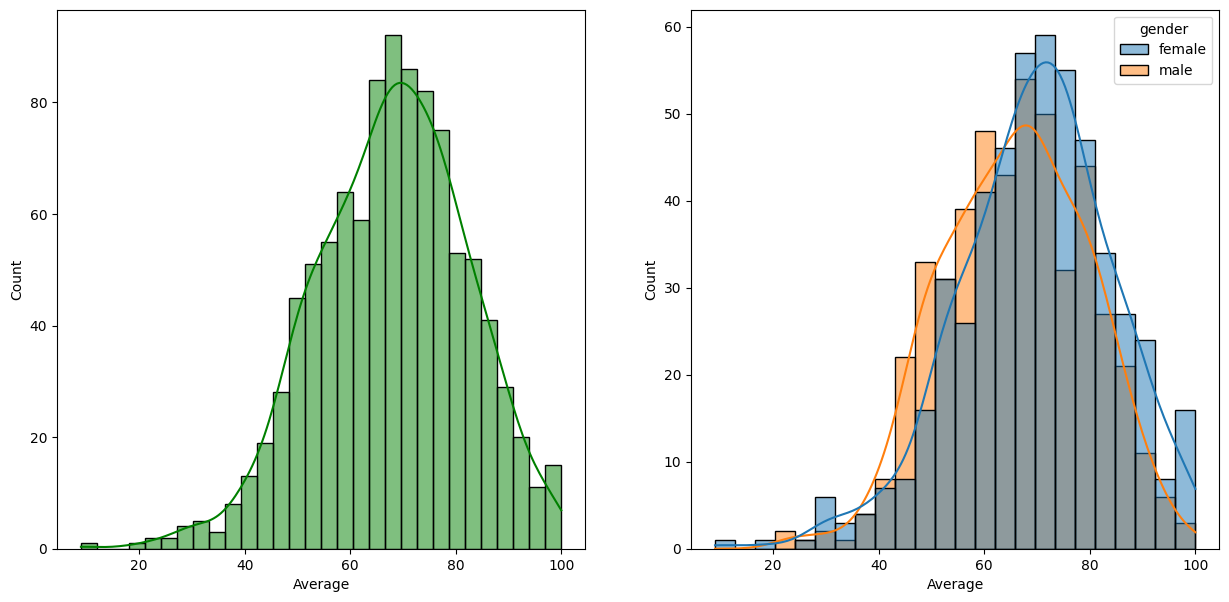

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sb.histplot(data=df,x='Average',kde=True,hue='gender')


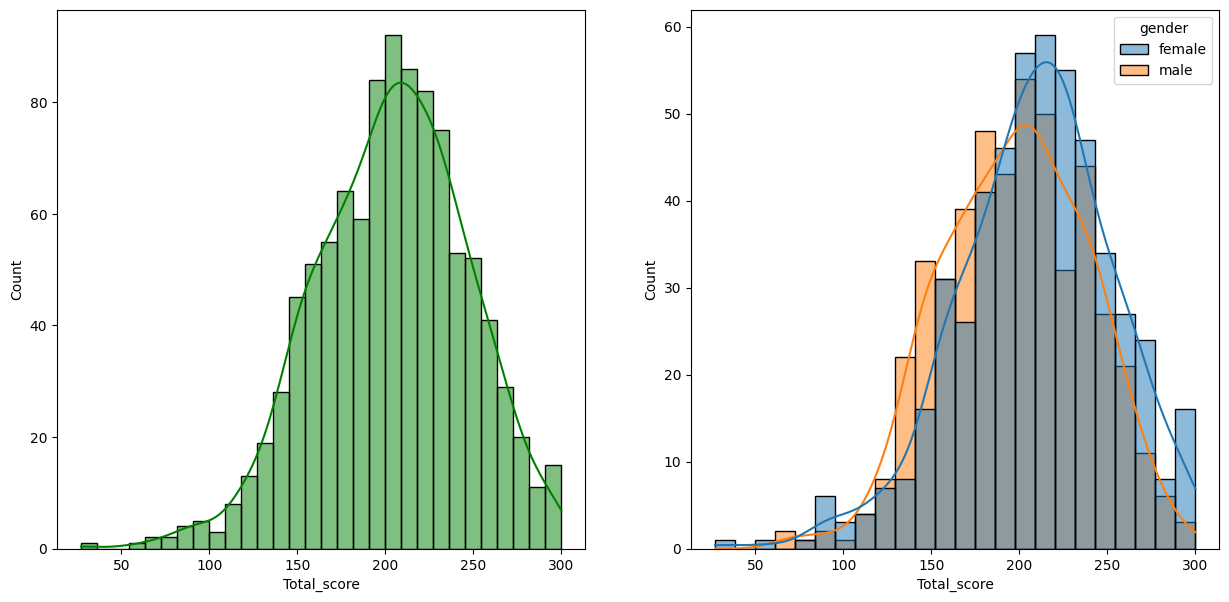

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sb.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sb.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

### Insights:-

- Female students tend to perform well then male students

<Axes: xlabel='Average', ylabel='Count'>

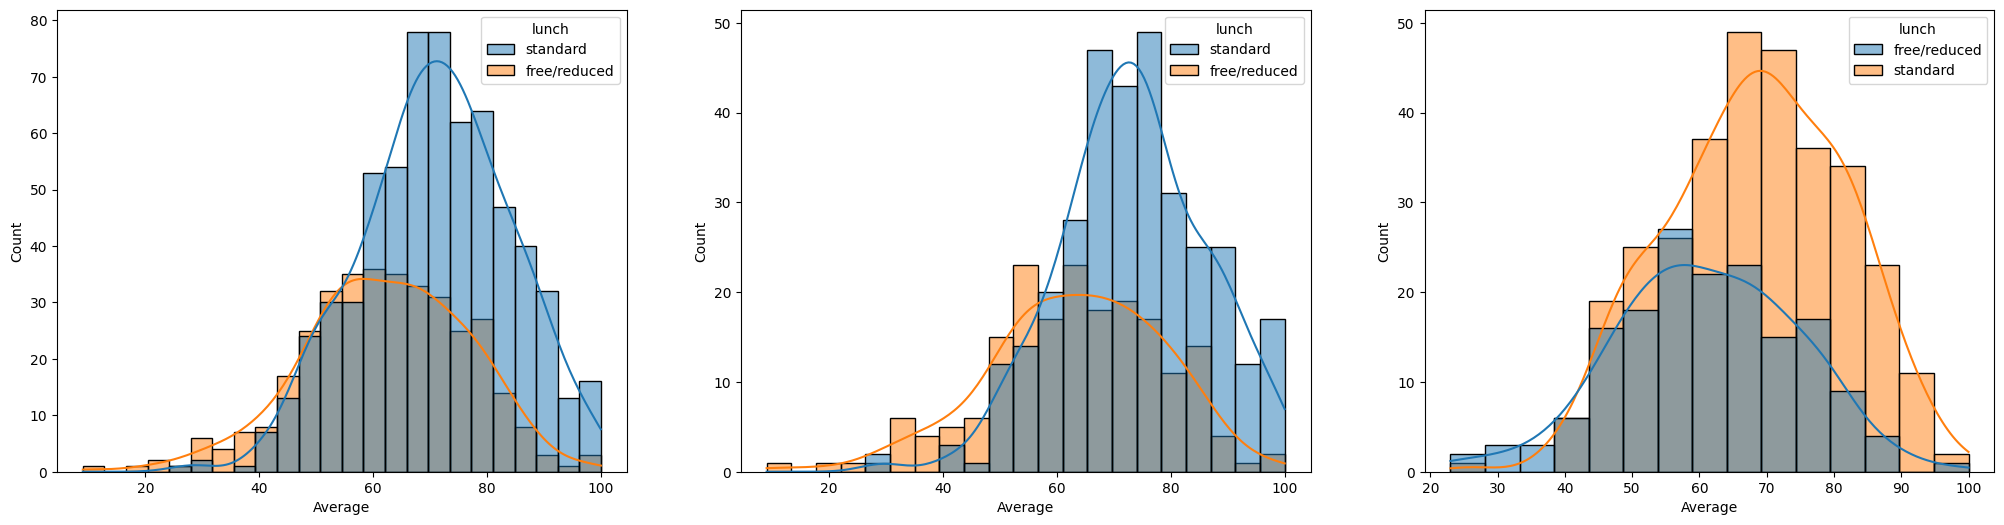

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sb.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(132)
sb.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(133)
sb.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')


### Insights:-

- Standard lunch helps perform well in exams.<br>
- Standard lunch helps perform well in exams be it a male or a female.

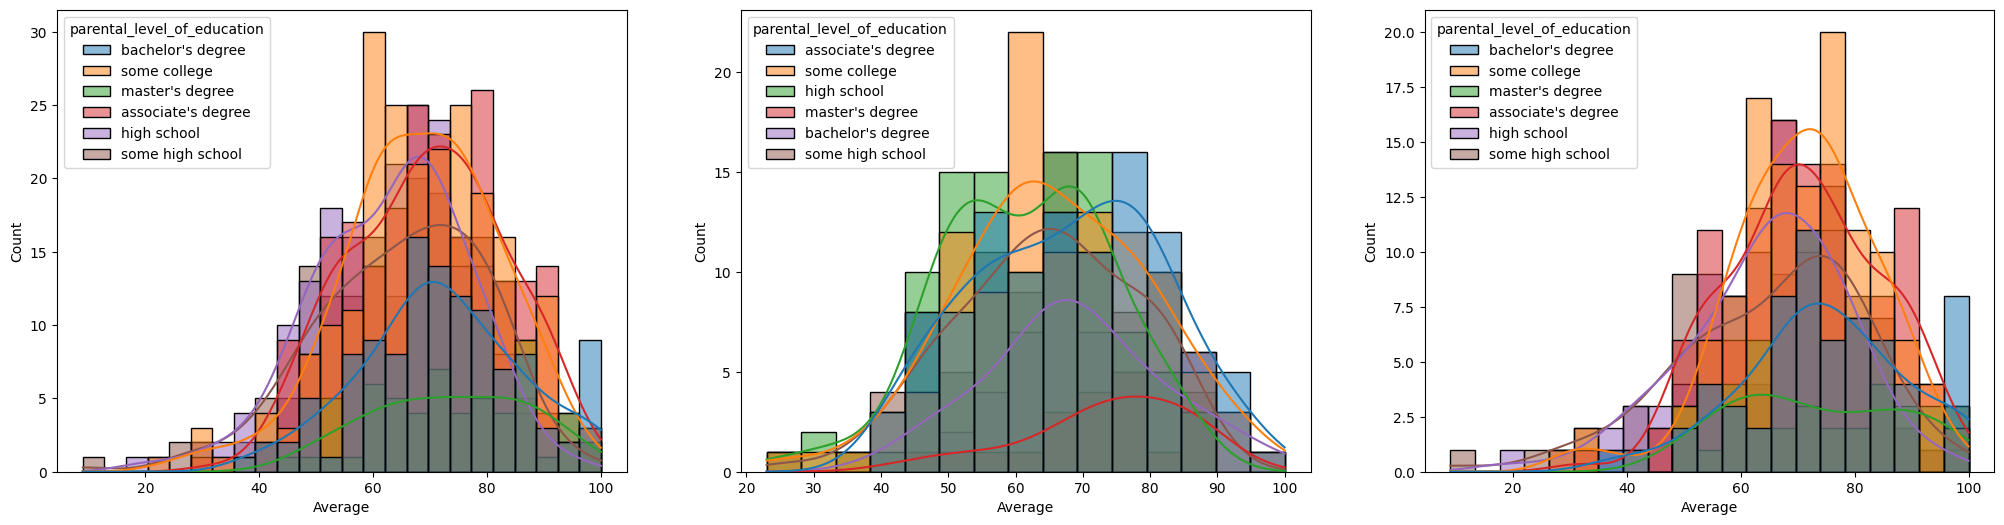

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sb.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sb.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sb.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights:-

- In general parent's education don't help student perform well in exam.<br>
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam<br>
- 3rd plot we can see there is no effect of parent's education on female students

### 4.2

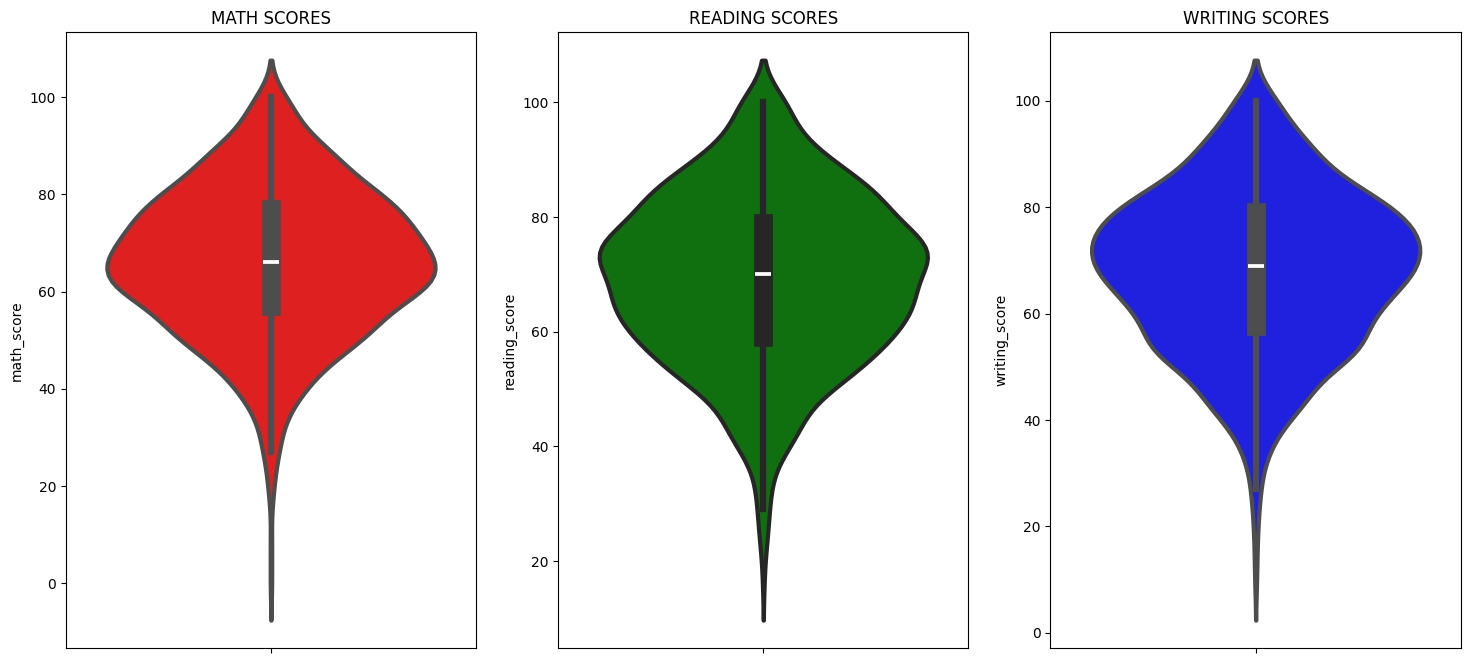

In [37]:
plt.figure(figsize=(18,8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sb.violinplot(y='math_score',data=df,color='red',linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sb.violinplot(y='reading_score',data=df,color='green',linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sb.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()